1.导入相关类库

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans

2.产生模拟数据

In [3]:
N = 2000
centers = 4
X, y = ds.make_blobs(n_samples=N, n_features=2, centers=centers)
print 'X: ', X

X:  [[ 4.94265734 -1.04174179]
 [ 9.48347749 -4.66530953]
 [-2.96217876 -2.77210991]
 ...
 [-2.67572118 -3.38995103]
 [-2.4040452   2.4308772 ]
 [-2.10187829  2.81950048]]


3.k-means构造

In [4]:
km = KMeans(n_clusters=centers, init='k-means++')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

4.模型可视化

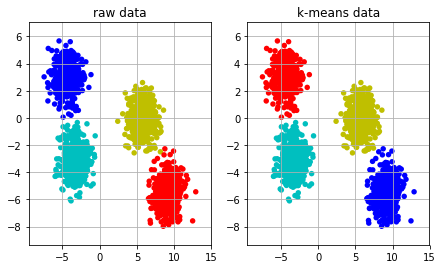

In [5]:
# 计算图形位置
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a - d, b + d

# 数据导入
data = X
y_predict = km.predict(X) # 计算原始数据集的预测结果
# 原始数据
cm = mpl.colors.ListedColormap(list('rgbmyc'))
plt.figure(figsize=(15, 9), facecolor='w')
plt.subplot(241)
plt.scatter(data[:, 0], data[: ,1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('raw data')
plt.grid(True)

# 聚类后的数据
plt.subplot(242)
plt.scatter(data[:, 0], data[:, 1], c=y_predict, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('k-means data')
plt.grid(True)

# 图形展示
plt.show()

5.模型评估

In [6]:
print "所有类聚类中心坐标"
cluster_centers = km.cluster_centers_
print cluster_centers

# 相同数据集评价
print "所有样本距离所属簇中心点的总距离和为%.5f" % km.inertia_
print "score是所有样本点离所属簇中心距离和的相反数%.5f" % km.score(X)

# 不同数据集评价
print "所有样本距离所属簇中心点的总距离和为%.5f" % (km.inertia_ / N)
print "score是所有样本点离所属簇中心距离和的相反数%.5f" % (km.score(X) / N)

所有类聚类中心坐标
[[-4.42816089  2.98937729]
 [ 9.16467341 -5.40610634]
 [ 5.68246895 -0.07948741]
 [-3.30153617 -3.14623371]]
所有样本距离所属簇中心点的总距离和为3857.14945
score是所有样本点离所属簇中心距离和的相反数-3857.14945
所有样本距离所属簇中心点的总距离和为1.92857
score是所有样本点离所属簇中心距离和的相反数-1.92857


6.模型的应用

In [7]:
y_predict = km.predict(X[:20])
print y_predict

[2 1 3 0 3 1 3 0 2 0 0 3 3 3 2 1 1 1 2 0]
